#Sistemes d'Aprenentatge Automàtic

##Xarxes Neuronals i Aprenentatge Profund

En aquest lliurament teniu tres preguntes, de 3, 3.5 i 3.5 punts.

La primera proposa modificar un sistema que teniu implementat al quadern de Colab enllaçat des dels apunts.

La segona consisteix a implementar una xarxa neuronal des de zero a partir de la seva descripció.

# 0. TensorFlow Playground
Experimentau amb https://playground.tensorflow.org/ la configuració de xarxes neuronals i tria de característiques per separar diferents conjunts de dades.

a. Triau el conjunt de dades de dos cercles concèntrics, sense cap capa interna. El model aconsegueix separar-los?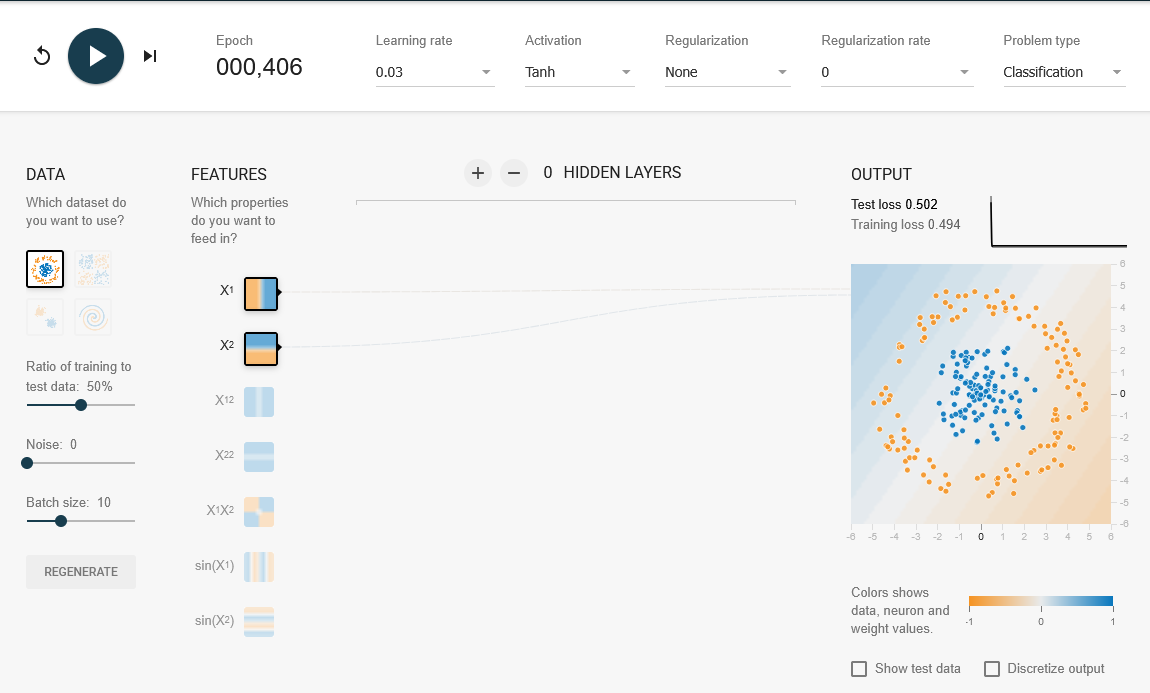

Com es pot observar, eliminat les hidden layers, el model no pot separar els conjunts de dades.

b. Quin és el mínim nombre de capes internes que necessitau per separar els dos cercles?

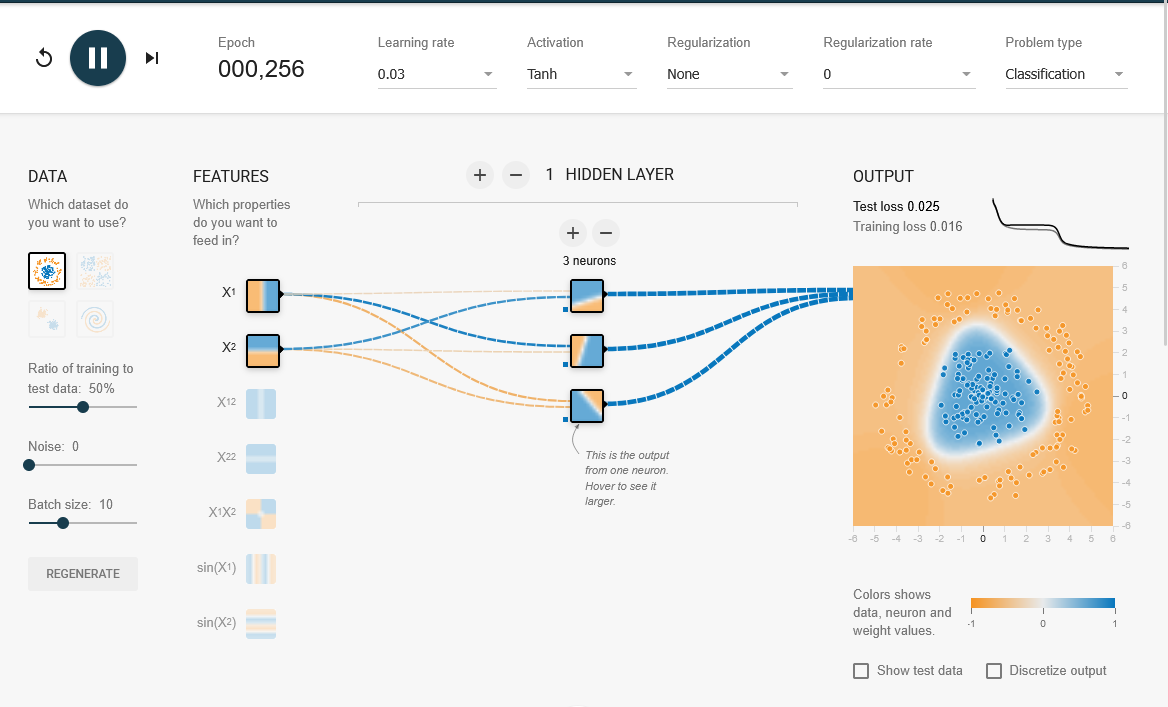

Es suficient amb 1 capa amb 3 neurones, pero podem tambe assolir-ho fent 2 capes de 3 neurones, algo menys eficient

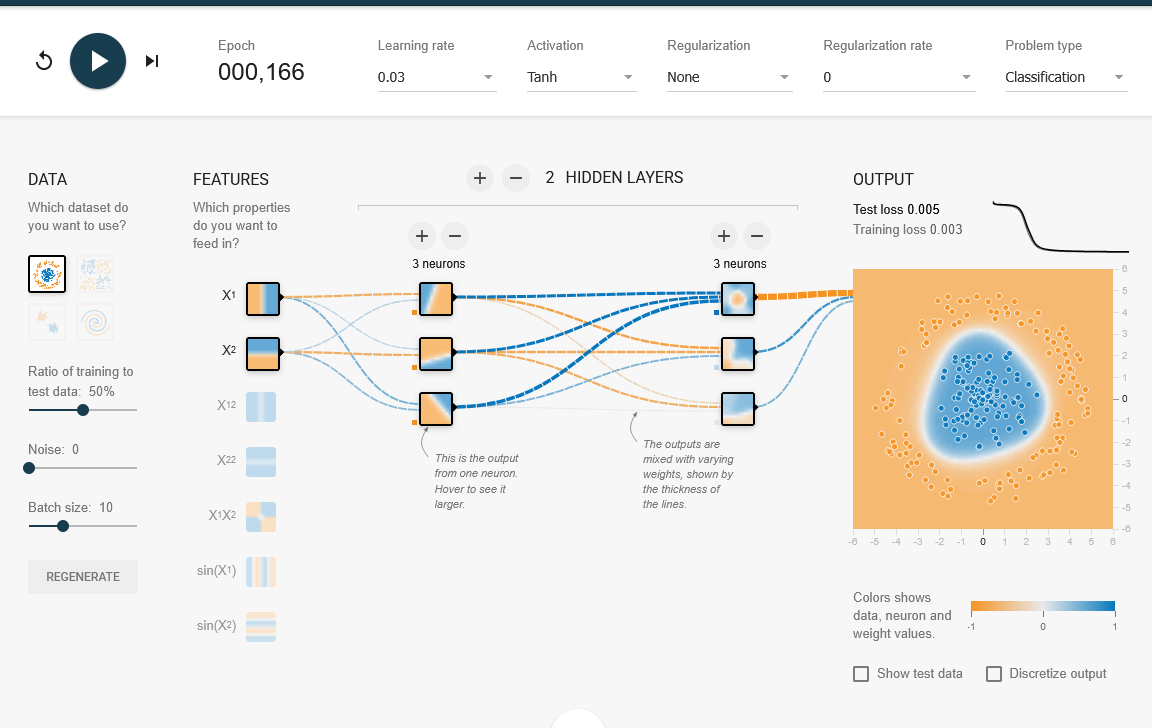

c. En el conjunt de dades de dos clústers separables linealment, és necessària alguna capa interna per poder-los distingir?
No, no ho es
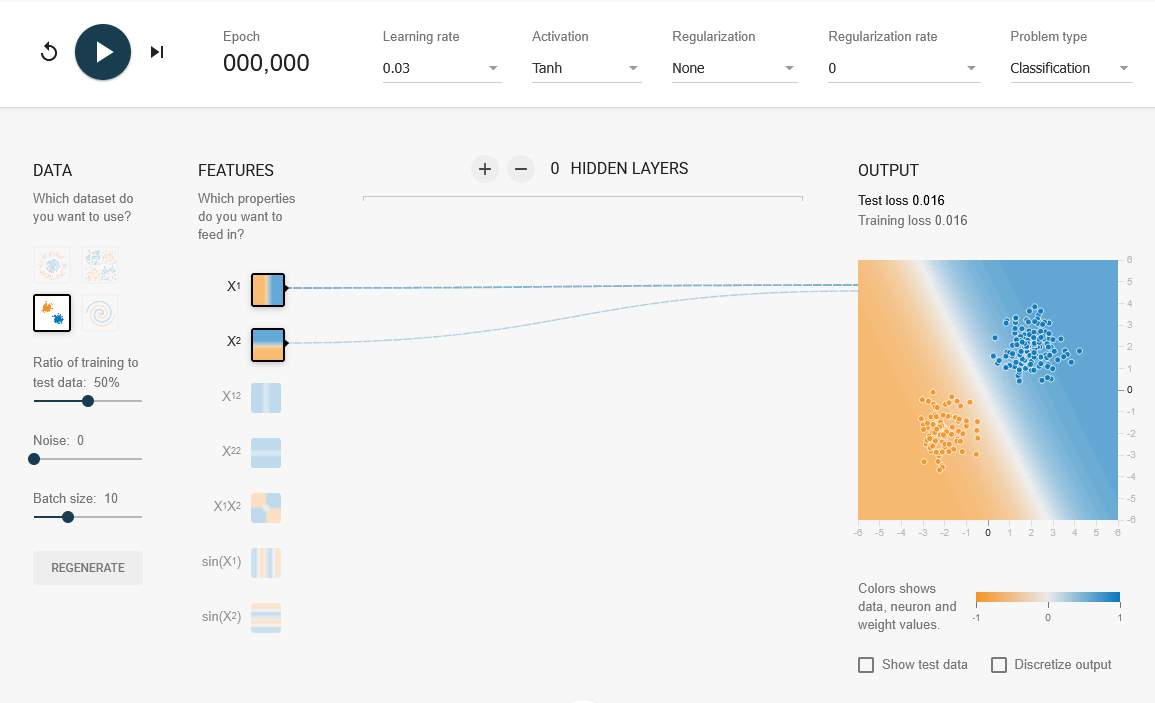

d. A les dades que correspon a la funció XOR, quina característica heu de triar per aconseguir separar les dades sense cap capa interna?
Haurem de seleccion
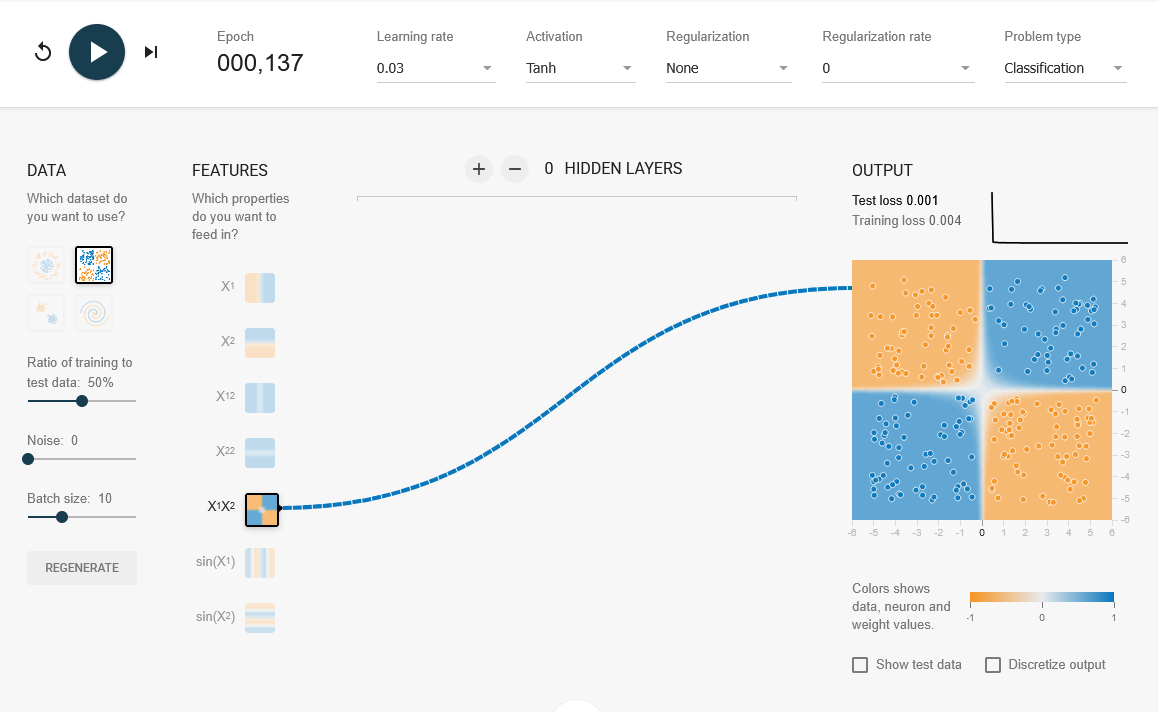

# 1. Millora de l'aplicació MNIST

Als apunts, hem aconseguit una precisió del 80% a la base de dades MNIST.

En aquesta pregunta, treballarem quatre aspectes del procés: modificarem la funció d'activació, afegirem una capa interna, canviarem l'optimitzador i finalment compararem els resultats amb els obtinguts abans.

a. Afegiu una capa intermèdia amb 100 neurones.

b. Usau la funció d'activació 'relu'.

c. Obteniu la mida del model (nombre de paràmetres entrenables). Justificau aquest valor en funció del nombre de neurones de cada capa.

d. Entrenau el model usant l'optimitzador Adam en comptes de SGD.

e. Comparau la precisió obtinguda amb el model sense modificar dels apunts.


Modified Model Summary:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,960 (38.91 KB)

 Trainable params: 9,960 (38.91 KB)

 Non-trainable params: 0 (0.00 B)


Parameter calculation explanation:
Input layer parameters: 7850
Hidden layer parameters: 1100
Output layer parameters: 1010
Total parameters: 9960

Training original model:
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3129 - loss: 2.1610 - val_accuracy: 0.6067 - val_loss: 1.6827
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6348 - loss: 1.5745 - val_accuracy: 0.7412 - val_loss: 1.2538
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7407 - loss: 1.2011 - val_accuracy: 0.7989 - val_loss: 1.0012
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7906 - loss: 0.9794 - val_accuracy: 0.8278 - val_loss: 0.8424
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8167 - loss: 0.8374 - val_accuracy: 0.8482 - val_loss: 0.7352

Training modified model:
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6945 - loss: 1.0420 - val_accuracy: 0.9167 - val_loss: 0.2836
Epoch 2/5
1500/1500 ━━━━━━

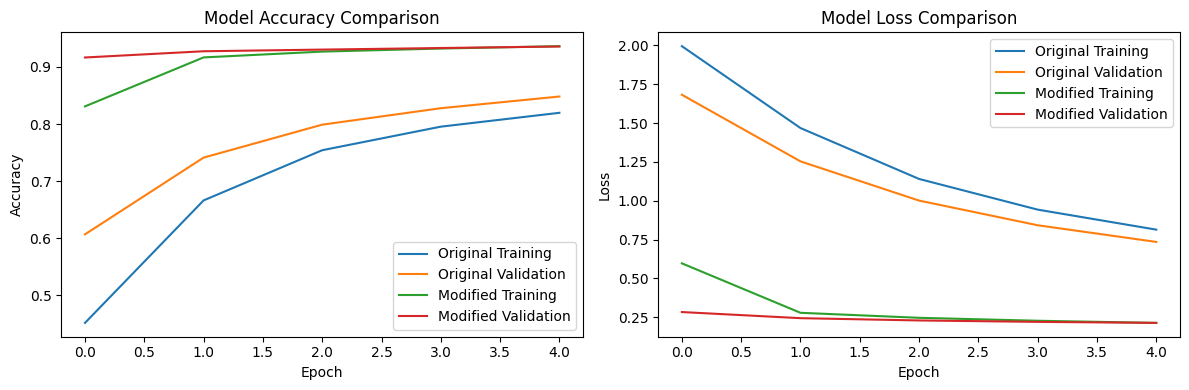

In [11]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model_original = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_original.compile(optimizer='sgd',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_modified = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

print("\nModified Model Summary:")
model_modified.summary()

# calculate and explain parameters
input_layer_params = 784 * 10 + 10
hidden_layer_params = 10 * 100 + 100
output_layer_params = 100 * 10 + 10
total_params = input_layer_params + hidden_layer_params + output_layer_params

print(f"\nParameter calculation explanation:")
print(f"Input layer parameters: {input_layer_params}")
print(f"Hidden layer parameters: {hidden_layer_params}")
print(f"Output layer parameters: {output_layer_params}")
print(f"Total parameters: {total_params}")

model_modified.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

print("\nTraining original model:")
history_original = model_original.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

print("\nTraining modified model:")
history_modified = model_modified.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

original_acc = history_original.history['val_accuracy'][-1]
modified_acc = history_modified.history['val_accuracy'][-1]

print("\nComparison of results:")
print(f"Original model validation accuracy: {original_acc:.4f}")
print(f"Modified model validation accuracy: {modified_acc:.4f}")
print(f"Improvement: {(modified_acc - original_acc) * 100:.2f}%")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Original Training')
plt.plot(history_original.history['val_accuracy'], label='Original Validation')
plt.plot(history_modified.history['accuracy'], label='Modified Training')
plt.plot(history_modified.history['val_accuracy'], label='Modified Validation')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_original.history['loss'], label='Original Training')
plt.plot(history_original.history['val_loss'], label='Original Validation')
plt.plot(history_modified.history['loss'], label='Modified Training')
plt.plot(history_modified.history['val_loss'], label='Modified Validation')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


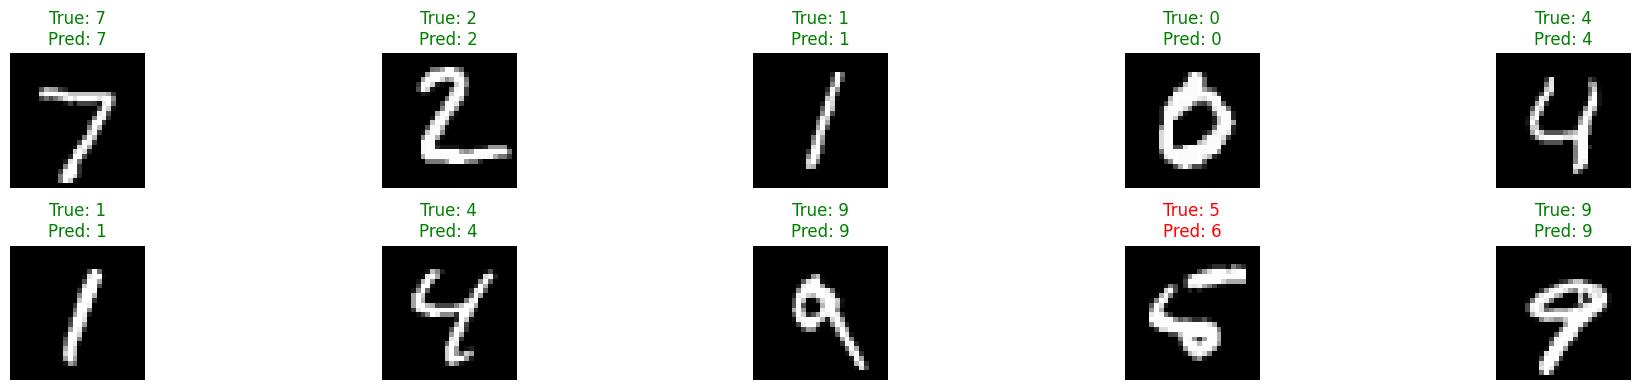


Classification Results:
----------------------
Image 1: True Label = 7, Predicted = 7 ✓
Image 2: True Label = 2, Predicted = 2 ✓
Image 3: True Label = 1, Predicted = 1 ✓
Image 4: True Label = 0, Predicted = 0 ✓
Image 5: True Label = 4, Predicted = 4 ✓
Image 6: True Label = 1, Predicted = 1 ✓
Image 7: True Label = 4, Predicted = 4 ✓
Image 8: True Label = 9, Predicted = 9 ✓
Image 9: True Label = 5, Predicted = 6 ✗
Image 10: True Label = 9, Predicted = 9 ✓


In [9]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model_modified.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)
plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = x_test[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\nClassification Results:")
print("----------------------")
for i in range(10):
    status = "✓" if predicted_labels[i] == true_labels[i] else "✗"
    print(f"Image {i+1}: True Label = {true_labels[i]}, Predicted = {predicted_labels[i]} {status}")

# 2. Replicació d'un experiment

Stephen Wolfram publicà un [article llarg](https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/) en què explica molts de conceptes d'aprenentatge automàtic. El podeu llegir complet; hi trobareu conceptes que ja coneixeu i d'altres que encara no.

En aquest exercici treballarem la xarxa neuronal que proposa per mirar de replicar l'experiment descrit i comprovar si obtenim resultats semblants.

Aproximarem la següent funció.
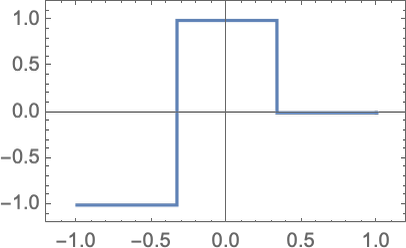


I utilitzarem aquesta arquitectura.

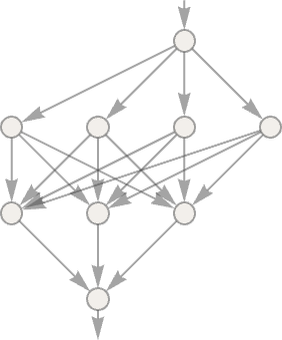

a. Calculau quants de paràmetres té la xarxa obtinguda, detallant quants de pesos i quants de biaixos hi ha en cada capa i en total. Teniu en compte que cada neurona té tants de pesos com fletxes hi entren i un biaix addicional.

b. Definiu la xarxa neuronal de la imatge usant Keras. Utilitzau la funció d'activació ReLU a les capes internes i la funció d'activació lineal a la darrera capa d'una sola neurona, ja que es tracta d'una aplicació de **regressió**.

c. Obteniu el resum de la vostra xarxa amb el mètode corresponent i comprovau que coincideix amb el que heu calculat a l'apartat a.

d. Generau un conjunt de dades adequat per entrenar la xarxa i obtenir una bona aproximació a la funció desitjada. Considerau un rang de valors d'$x$ entre $-5$ i $5$ i valors d'$y$ d'acord amb la funció de tres regions constants indicada. En aquest cas, els valors d'$x$ tant poden ser aleatoris com distribuïts equitativament, no ha de canviar gaire el resultat.

e. Mostrau la funció aproximada per la vostra xarxa per a diferents mides del conjunt d'entrenament. Podeu prendre com a orientació els valors donats a l'article (10000, 100000, 1000000 i 10000000). Coincideixen les vostres aproximacions amb les mostrades a l'article?

Model Summary:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)


Detailed parameter calculation:
Layer 1 (Input → 4 neurons):
Weights: 1 input × 4 neurons = 4
Biases: 4 neurons × 1 = 4
Total parameters: 8

Layer 2 (4 → 4 neurons):
Weights: 4 inputs × 4 neurons = 16
Biases: 4 neurons × 1 = 4
Total parameters: 20

Layer 3 (4 → 3 neurons):
Weights: 4 inputs × 3 neurons = 12
Biases: 3 neurons × 1 = 3
Total parameters: 15

Layer 4 (3 → 1 neuron):
Weights: 3 inputs × 1 neuron = 3
Biases: 1 neuron × 1 = 1
Total parameters: 4

Total network parameters: 47
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


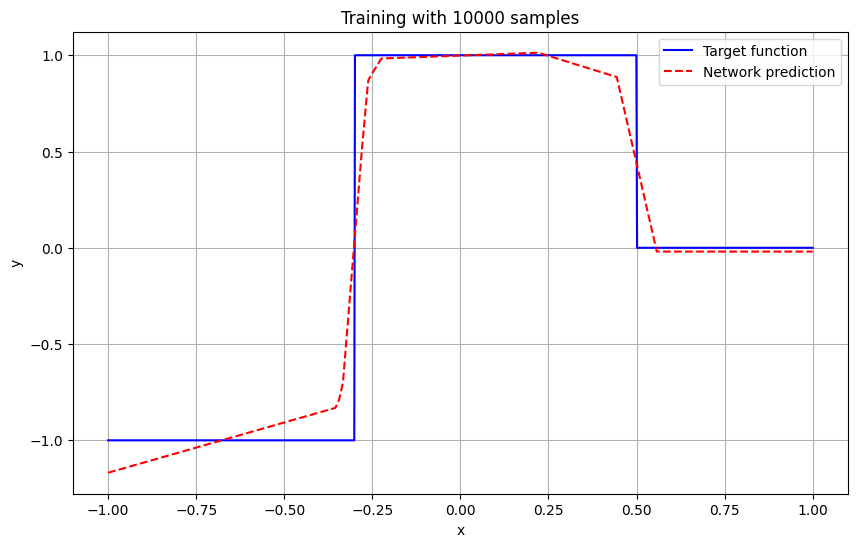

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


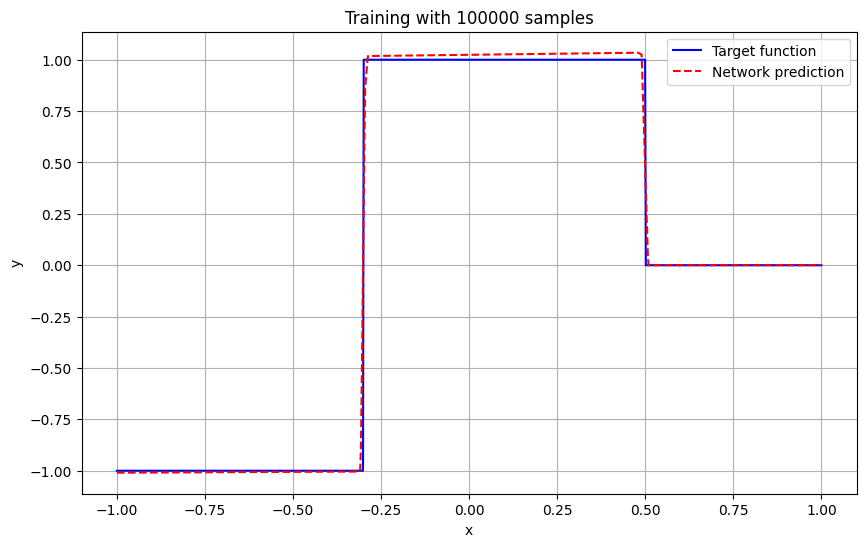

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def target_function(x):
    y = np.zeros_like(x)
    y[x < -0.3] = -1
    y[(x >= -0.3) & (x <= 0.5)] = 1
    y[x > 0.5] = 0
    return y

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
print("Model Summary:")
model.summary()

print("\nDetailed parameter calculation:")
print("Layer 1 (Input → 4 neurons):")
print(f"Weights: 1 input × 4 neurons = {1 * 4}")
print(f"Biases: 4 neurons × 1 = {4}")
print(f"Total parameters: {1 * 4 + 4}")

print("\nLayer 2 (4 → 4 neurons):")
print(f"Weights: 4 inputs × 4 neurons = {4 * 4}")
print(f"Biases: 4 neurons × 1 = {4}")
print(f"Total parameters: {4 * 4 + 4}")

print("\nLayer 3 (4 → 3 neurons):")
print(f"Weights: 4 inputs × 3 neurons = {4 * 3}")
print(f"Biases: 3 neurons × 1 = {3}")
print(f"Total parameters: {4 * 3 + 3}")

print("\nLayer 4 (3 → 1 neuron):")
print(f"Weights: 3 inputs × 1 neuron = {3 * 1}")
print(f"Biases: 1 neuron × 1 = {1}")
print(f"Total parameters: {3 * 1 + 1}")

total_params = (1 * 4 + 4) + (4 * 4 + 4) + (4 * 3 + 3) + (3 * 1 + 1)
print(f"\nTotal network parameters: {total_params}")

model.compile(optimizer='adam', loss='mse')

def train_and_plot(n_samples):
    x_train = np.random.uniform(-1, 1, n_samples)
    y_train = target_function(x_train)
    model.fit(x_train, y_train, epochs=5, batch_size=10, verbose=0)

    x_test = np.linspace(-1, 1, 1000)
    y_pred = model.predict(x_test)

    plt.figure(figsize=(10, 6))
    plt.plot(x_test, target_function(x_test), 'b-', label='Target function')
    plt.plot(x_test, y_pred, 'r--', label='Network prediction')
    plt.title(f'Training with {n_samples} samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

sample_sizes = [10000, 100000, 1000000, 10000000]
for n_samples in sample_sizes:
    train_and_plot(n_samples)
